
###Baseline Model


In [ ]:
%tensorflow_version 2.12


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow.python.lib.io import file_io

import keras
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.metrics import confusion_matrix
from seaborn import heatmap


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
EPOCH = 150
BS = 128
DROPOUT_RATE = 0.3
SGD_LEARNING_RATE = 0.01
SGD_DECAY = 0.0001


In [ ]:


from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from keras.optimizers import SGD


model = Sequential()
model.add(BatchNormalization(input_shape=(48,48,1)))
model.add(Conv2D(32,(3,3),activation ='relu', padding ='same', input_shape=(48,48,1),name ='conv1'))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size =(2,2), name ='maxpool1'))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation ='relu', padding ='same', input_shape=(48,48,1),name ='conv2'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2), name ='maxpool2'))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation ='relu', padding ='same', input_shape=(48,48,1),name ='conv3'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2), name ='maxpool3'))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation ='relu', padding ='same', input_shape=(48,48,1),name ='conv4'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2), name ='maxpool4'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1024, activation ='relu', name ='fc1'))
model.add(Dropout(DROPOUT_RATE))
model.add(BatchNormalization())
model.add(Dense(7, activation = 'softmax', name ='fcsoftmax'))


#TODO: weight decay of 0.0001.. initial learning rate is set to 0.01 and reduced by a factor of 2 at every 25 epoch
lr_schedule = ExponentialDecay(
     initial_learning_rate=SGD_LEARNING_RATE,
    decay_steps=100000,
   decay_rate=SGD_DECAY
)
sgd = SGD(learning_rate =lr_schedule, momentum=0.9)
model.compile(loss ='categorical_crossentropy', optimizer =sgd, metrics=['accuracy'])

#checkpoint
cp_filepath = '/content/drive/My Drive/ CSE499A/models/Baseline-weights-best.hdf5'
rlrop = ReduceLROnPlateau(monitor ='val_accuracy', mode ='max', factor =0.5, patience =10,min_lr =0.00001, verbose =1)
checkpoint = ModelCheckpoint(cp_filepath, monitor = 'val_accuracy',verbose =1, save_best_only=True, mode = 'max')
callbacks_list = [rlrop]











In [ ]:
! rm -rf train; mkdir train
! unzip -q 'drive/My Drive/CSE499A/Datasets/train.zip' -d train

In [ ]:
! rm -rf dev; mkdir dev;
! unzip -q 'drive/My Drive/CSE499A/Datasets/test-public.zip' -d dev
! rm -rf test; mkdir test
! unzip -q 'drive/My Drive/CSE499A/Datasets/test-private.zip' -d test


In [ ]:
%%bash
root='/content/train/'
IFS=$(echo -en "\n\b")
(for dir in $(ls -1 "$root")
    do printf "$dir: " && ls -i "$root/$dir" | wc -l
 done)

0 angry: 3995
1 disgust: 436
2 fear: 4097
3 happy: 7215
4 sad: 4830
5 surprise: 3171
6 neutral: 4965


In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

def get_datagen(dataset, aug=False):
  if aug:
    datagen = ImageDataGenerator(
            rescale = 1./255,
            featurewise_center=False,
            featurewise_std_normalization=False,
            rotation_range=10,
            width_shift_range = 0.1,
            height_shift_range=0.1,
            zoom_range = 0.1,
            horizontal_flip = True
    )
  else:
       datagen = ImageDataGenerator (rescale = 1./255)

  return datagen.flow_from_directory(
      dataset,
      target_size =(48,48),
      color_mode = 'grayscale',
      shuffle = True,
      class_mode = 'categorical',
      batch_size =BS)




In [ ]:
train_generator = get_datagen('/content/train', True)
dev_generator = get_datagen('/content/dev')
test_generator = get_datagen('/content/test')



Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [ ]:
history = model.fit(
    x=train_generator,
    validation_data=dev_generator,
    shuffle=True,
    epochs=EPOCH,
    callbacks=callbacks_list,
    use_multiprocessing=False,
)




Epoch 1/150
225/225 [==============================] - 29s 129ms/step - loss: 1.8403 - accuracy: 0.2936 - val_loss: 1.7454 - val_accuracy: 0.3196 - lr: 0.0097
Epoch 2/150
225/225 [==============================] - 28s 125ms/step - loss: 1.7643 - accuracy: 0.3227 - val_loss: 1.5564 - val_accuracy: 0.4023 - lr: 0.0095
Epoch 3/150
225/225 [==============================] - 28s 122ms/step - loss: 1.7066 - accuracy: 0.3433 - val_loss: 1.6292 - val_accuracy: 0.4021 - lr: 0.0093
Epoch 4/150
225/225 [==============================] - 28s 124ms/step - loss: 1.6268 - accuracy: 0.3776 - val_loss: 1.4241 - val_accuracy: 0.4533 - lr: 0.0091
Epoch 5/150
225/225 [==============================] - 30s 132ms/step - loss: 1.5556 - accuracy: 0.4066 - val_loss: 1.3822 - val_accuracy: 0.4829 - lr: 0.0089
Epoch 6/150
225/225 [==============================] - 27s 121ms/step - loss: 1.5221 - accuracy: 0.4211 - val_loss: 1.3402 - val_accuracy: 0.4884 - lr: 0.0087
Epoch 7/150
225/225 [=========================

In [ ]:
print('\n# Evaluate on dev data')
results_dev = model.evaluate(x=dev_generator, steps=3509//BS)
print('Dev loss, Dev acc:', results_dev)




# Evaluate on dev data
27/27 [==============================] - 2s 79ms/step - loss: 0.9699 - accuracy: 0.6386
Dev loss, Dev acc: [0.9698939919471741, 0.6385995149612427]


In [ ]:
print('\n# Evaluate on test data')
results_test = model.evaluate(x=test_generator, steps=3509//BS)
print('Test loss, test acc: ', results_test)



# Evaluate on test data
27/27 [==============================] - 1s 47ms/step - loss: 0.9377 - accuracy: 0.6594
Test loss, test acc:  [0.9376516938209534, 0.6594328880310059]


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


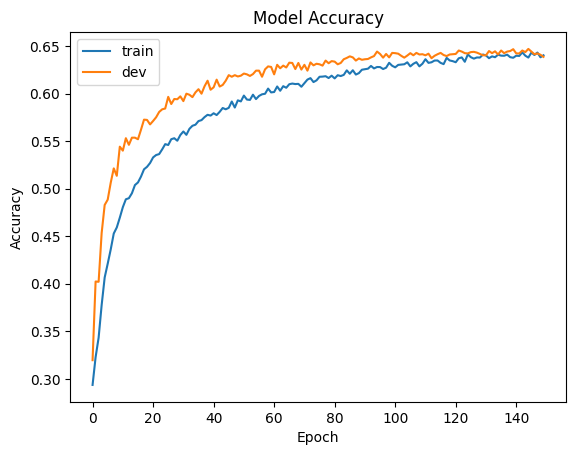

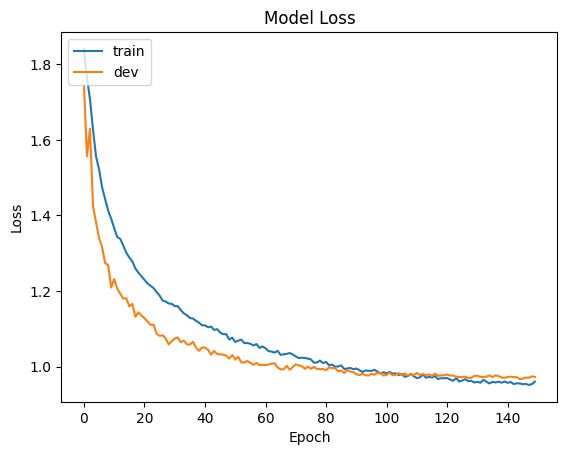

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','dev'], loc ='upper left')
plt.show()
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','dev'], loc ='upper left')
plt.show()


In [ ]:
epoch_str = '-EPOCHS_' +str(EPOCH)
dropout_str = '-DROPOUT_' +str(DROPOUT_RATE)
test_acc = '-test_acc_%.3f' %results_test[1]
model.save('/content/drive/My Drive/CSE499A/models/' + 'SOA' + epoch_str + dropout_str + test_acc + '.h5')




/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from sklearn.metrics import accuracy_score
#configure image data augmentation
datagen = ImageDataGenerator(horizontal_flip = True)
#make predictions using test-time augmentation
def tta_prediction(datagen,model,image, n_examples):
    # convert image to dataset
    samples = np.expand_dims(image,0)
    #prepare iterator:
    it = datagen.flow(samples,batch_size =n_examples)
    #make predictions for each augmented image
    yhats = model.predict(it, steps=n_examples, verbose =0)
    # sum across predictions
    summed = np.sum(yhats,axis =0)
    #argmax across classes
    return np.argmax(summed)


# evaluate a model on a dataset using test time augmentation
def tta_evaluate_model(model,testX,testY):
# configure image data augmentation
	datagen = ImageDataGenerator(horizontal_flip=True)
	# define the number of augmented images to generate per test set image
	n_examples_per_image = 7
	yhats = list()
	for i in range(len(testX)):
		# make augmented prediction
		yhat = tta_prediction(datagen, model, testX[i], n_examples_per_image)
		# store for evaluation
		yhats.append(yhat)
	# calculate accuracy
	testY_labels = np.argmax(testY, axis=1)
	acc = accuracy_score(testY_labels, yhats)
	return acc







In [ ]:
print('\n# Evaluate on test data')
TTA_results_test = tta_evaluate_model(model, X_test, Y_test)
print('test loss, test acc:', results_test)
print('TTA test acc:', TTA_results_test)